In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.ExcelFile("table_8_offenses_known_to_law_enforcement_new_york_by_city_2013.xls")

In [3]:
df.sheet_names

['13tbl8ny']

In [4]:
df = df.parse(sheetname='13tbl8ny', skiprows=4)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  """Entry point for launching an IPython kernel.


In [5]:
df.head()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
0,Adams Village,1861.0,0.0,0.0,NaN,0.0,0.0,0.0,12.0,2.0,10.0,0.0,0.0
1,Addison Town and Village,2577.0,3.0,0.0,NaN,0.0,0.0,3.0,24.0,3.0,20.0,1.0,0.0
2,Akron Village,2846.0,3.0,0.0,NaN,0.0,0.0,3.0,16.0,1.0,15.0,0.0,0.0
3,Albany,97956.0,791.0,8.0,NaN,30.0,227.0,526.0,4090.0,705.0,3243.0,142.0,NaN
4,Albion Village,6388.0,23.0,0.0,NaN,3.0,4.0,16.0,223.0,53.0,165.0,5.0,NaN


In [6]:
df.columns

Index(['City', 'Population', 'Violent\ncrime',
       'Murder and\nnonnegligent\nmanslaughter',
       'Rape\n(revised\ndefinition)1', 'Rape\n(legacy\ndefinition)2',
       'Robbery', 'Aggravated\nassault', 'Property\ncrime', 'Burglary',
       'Larceny-\ntheft', 'Motor\nvehicle\ntheft', 'Arson3'],
      dtype='object')

In [7]:
# Checking for null cells or outliers...

print(df['Population'].isnull().values.any())
print(df['Murder and\nnonnegligent\nmanslaughter'].isnull().values.any())
print(df['Robbery'].isnull().values.any())

True
True
True


In [8]:
# Creating the features df
features = df[['Population']]
features['Murder_raw'] = df['Murder and\nnonnegligent\nmanslaughter']
features['Robbery_raw'] = df['Robbery']

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [9]:
features = features.dropna(subset=['Population'])
features = features.dropna(subset=['Murder_raw'])
features = features.dropna(subset=['Robbery_raw'])

/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


Text(0.5,1,'Population')

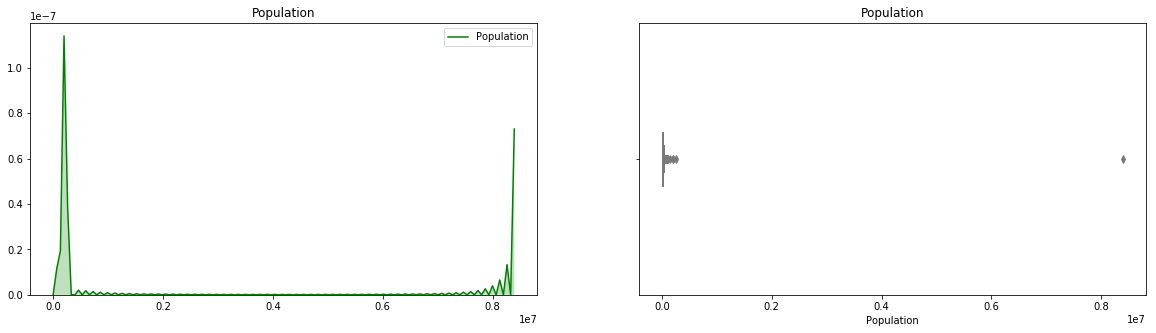

In [10]:
x = df['Population']

fig = plt.figure(figsize=(20,5))

fig.add_subplot(121)
sns.kdeplot(x, shade=True, bw=.6, color='g')
plt.title('Population')

fig.add_subplot(122)
sns.boxplot(x, linewidth=1, width=0.2, palette='pastel', orient='h')
plt.title('Population')

In [11]:
print(np.sort(features.Population)[-20:])

[  51506.   55198.   57559.   58082.   61686.   66041.   68071.   78215.
   78361.   78800.   80705.   87204.   96667.   97956.  118296.  143834.
  199134.  210562.  258789. 8396126.]


In [12]:
features['Population'] = features[features.Population < 80000000.0]

In [13]:
features.head()

,Population,Murder_raw,Robbery_raw
0,1861.0,0.0,0.0
1,2577.0,0.0,0.0
2,2846.0,0.0,0.0
3,97956.0,8.0,227.0
4,6388.0,0.0,4.0


In [14]:
# Population squared, Murder and Robbery categorical features
features['Population^2'] = np.square(features['Population'])
features['Murder'] = 0
features['Robbery'] = 0
features.loc[(features['Murder_raw'] > 0), 'Murder'] = 1
features.loc[(features['Robbery_raw'] > 0), 'Robbery'] = 1

In [17]:
features = features.drop(columns='Murder_raw', axis=1)
features = features.drop(columns='Robbery_raw', axis=1)

In [18]:
features.head()

,Population,Population^2,Murder,Robbery
0,1861.0,3.463321e+06,0,0
1,2577.0,6.640929e+06,0,0
2,2846.0,8.099716e+06,0,0
3,97956.0,9.595378e+09,1,1
4,6388.0,4.080654e+07,0,1
